In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_tap.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
#Observations on shape of data and data types of all attributes
df.shape

(396030, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [5]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [6]:
numerical_col_df=df.select_dtypes(include=['int', 'float'])
numerical_col_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [7]:
categorical_col_df=df.select_dtypes(include='object')
categorical_col_df.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


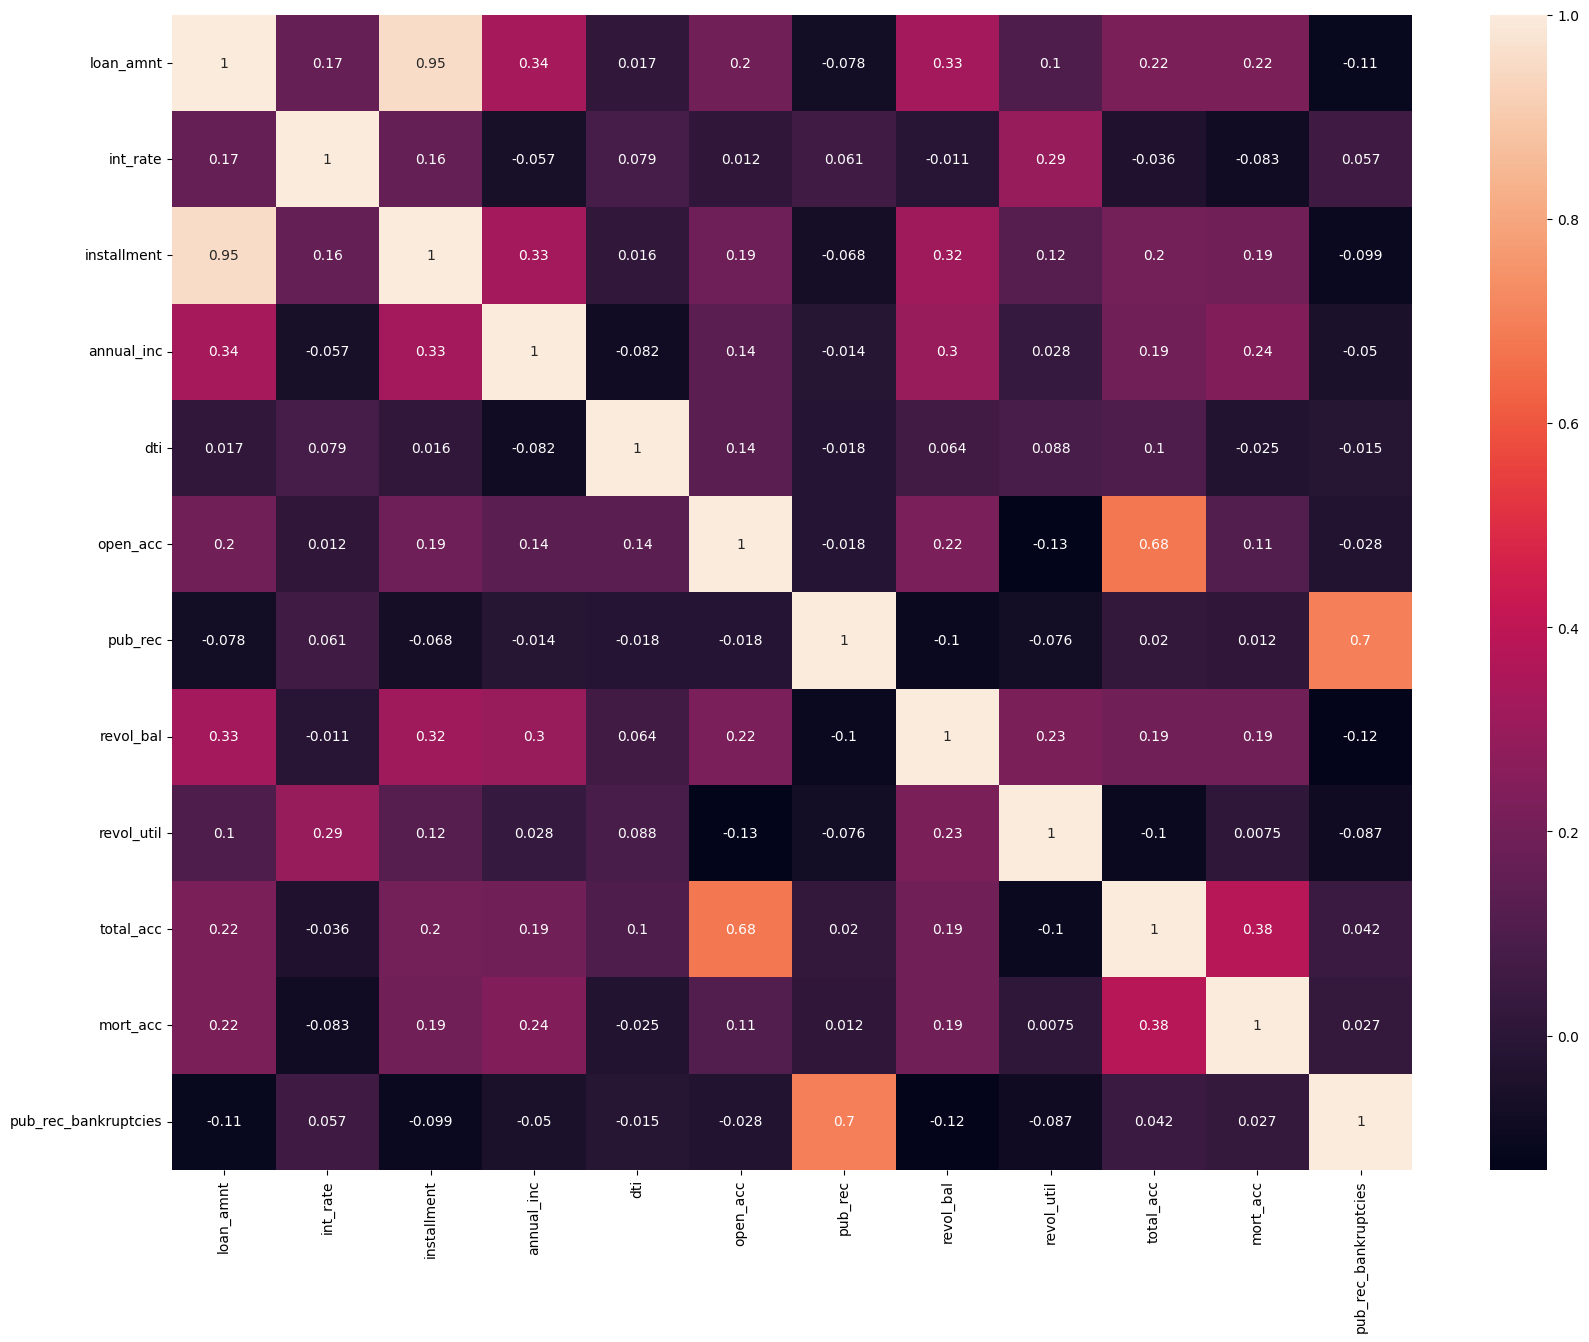

In [8]:
#checking the correlation between numeric columns
plt.figure(figsize=(20,15))
sns.heatmap(numerical_col_df.corr(), annot=True)
plt.show()

### Checking the missing Values

In [8]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Filling the missing values 

In [9]:
# Filling missing values in categorical columns
df['emp_title']=df['emp_title'].fillna('Unknown')

df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])

df['title']=df['title'].fillna(df['title'].mode()[0])

In [10]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())

df['mort_acc']=df['mort_acc'].fillna(df['mort_acc'].median())

df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])


###  Detection of Outliers

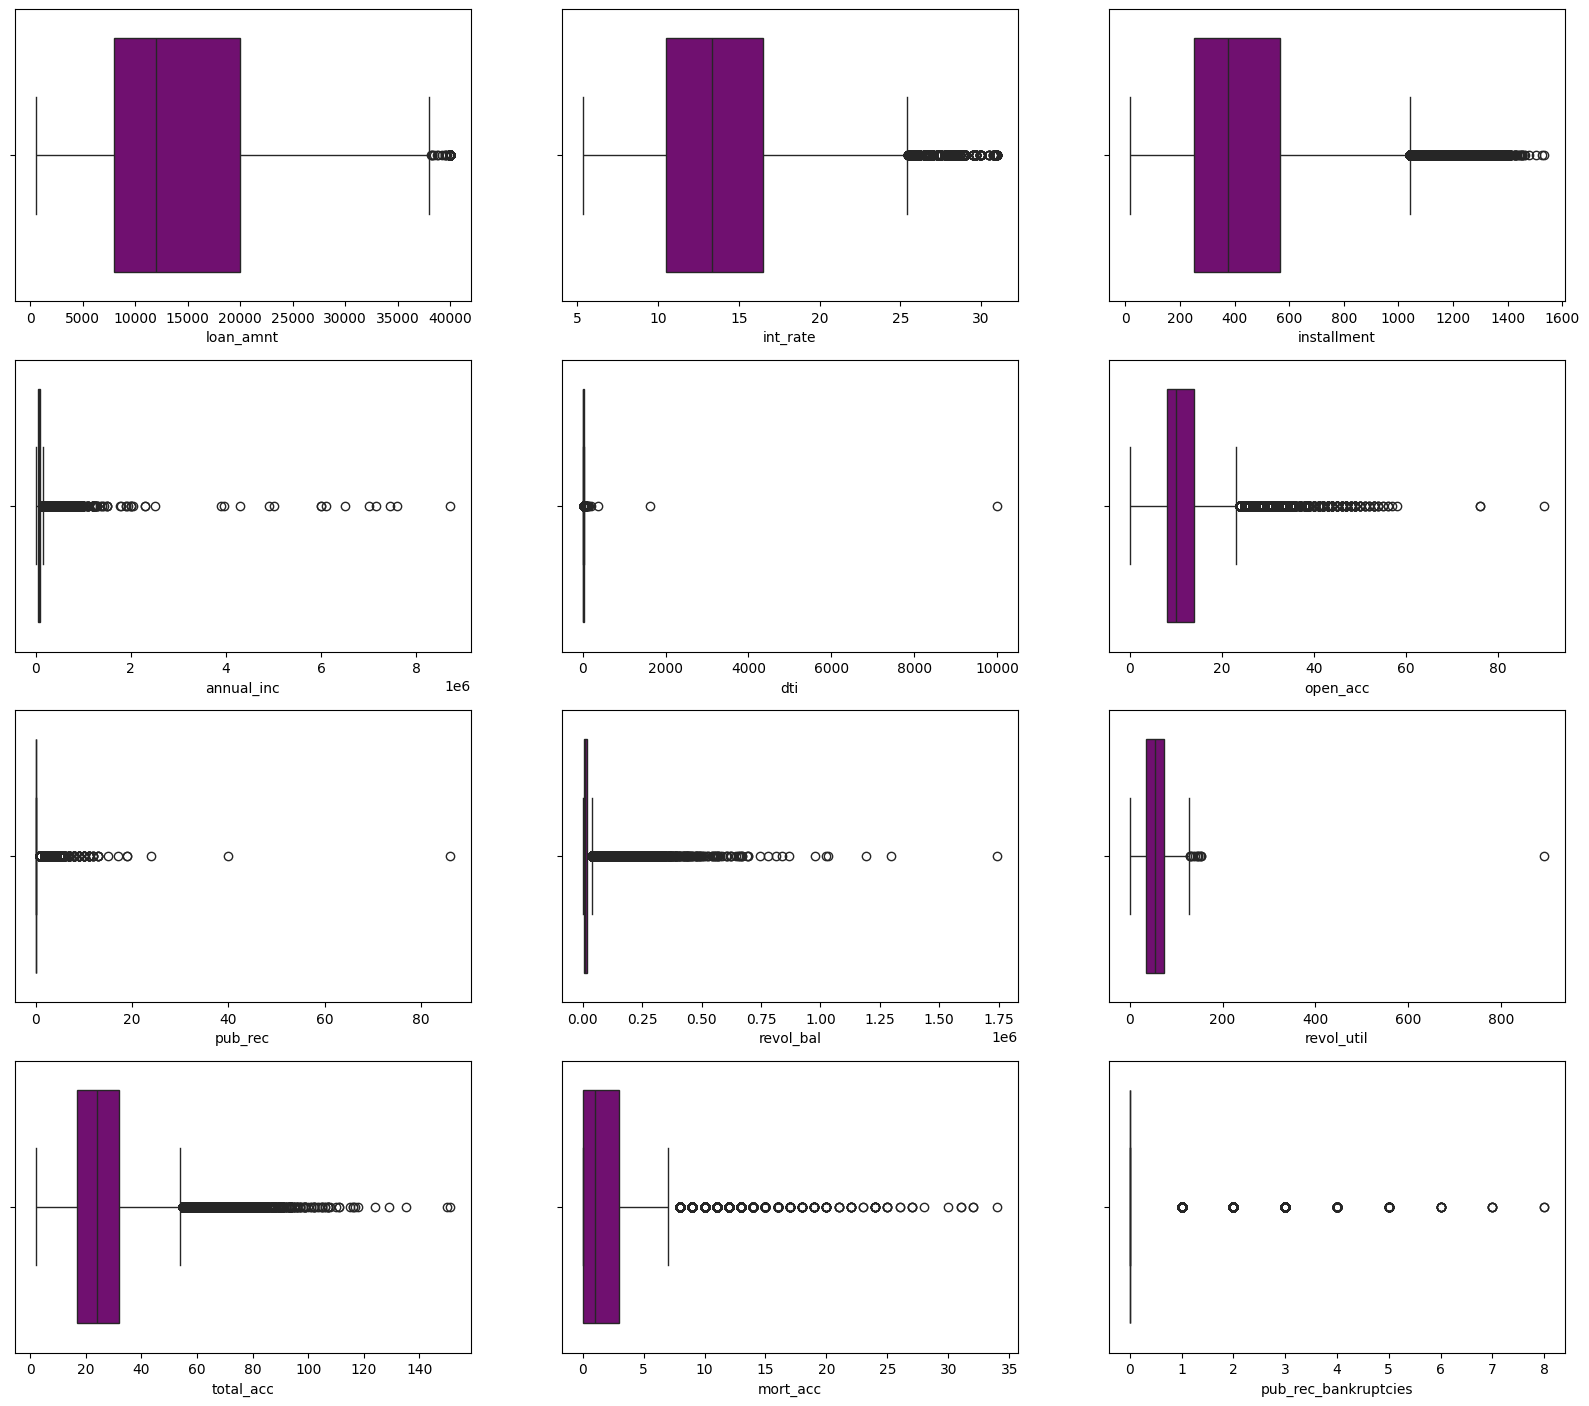

In [11]:
plt.figure(figsize=(20,22))
for i in range(len(numerical_col_df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df[numerical_col_df.columns[i]], color='purple')
plt.show()

### Treating Outliers

In [11]:
for col in numerical_col_df:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    upper_whisker=Q3+1.5*IQR
    lower_whisker=Q1-1.5*IQR
    median=df[col].median()
    df[col]=np.where((df[col] < lower_whisker) | (df[col] > upper_whisker),
                          median, df[col])

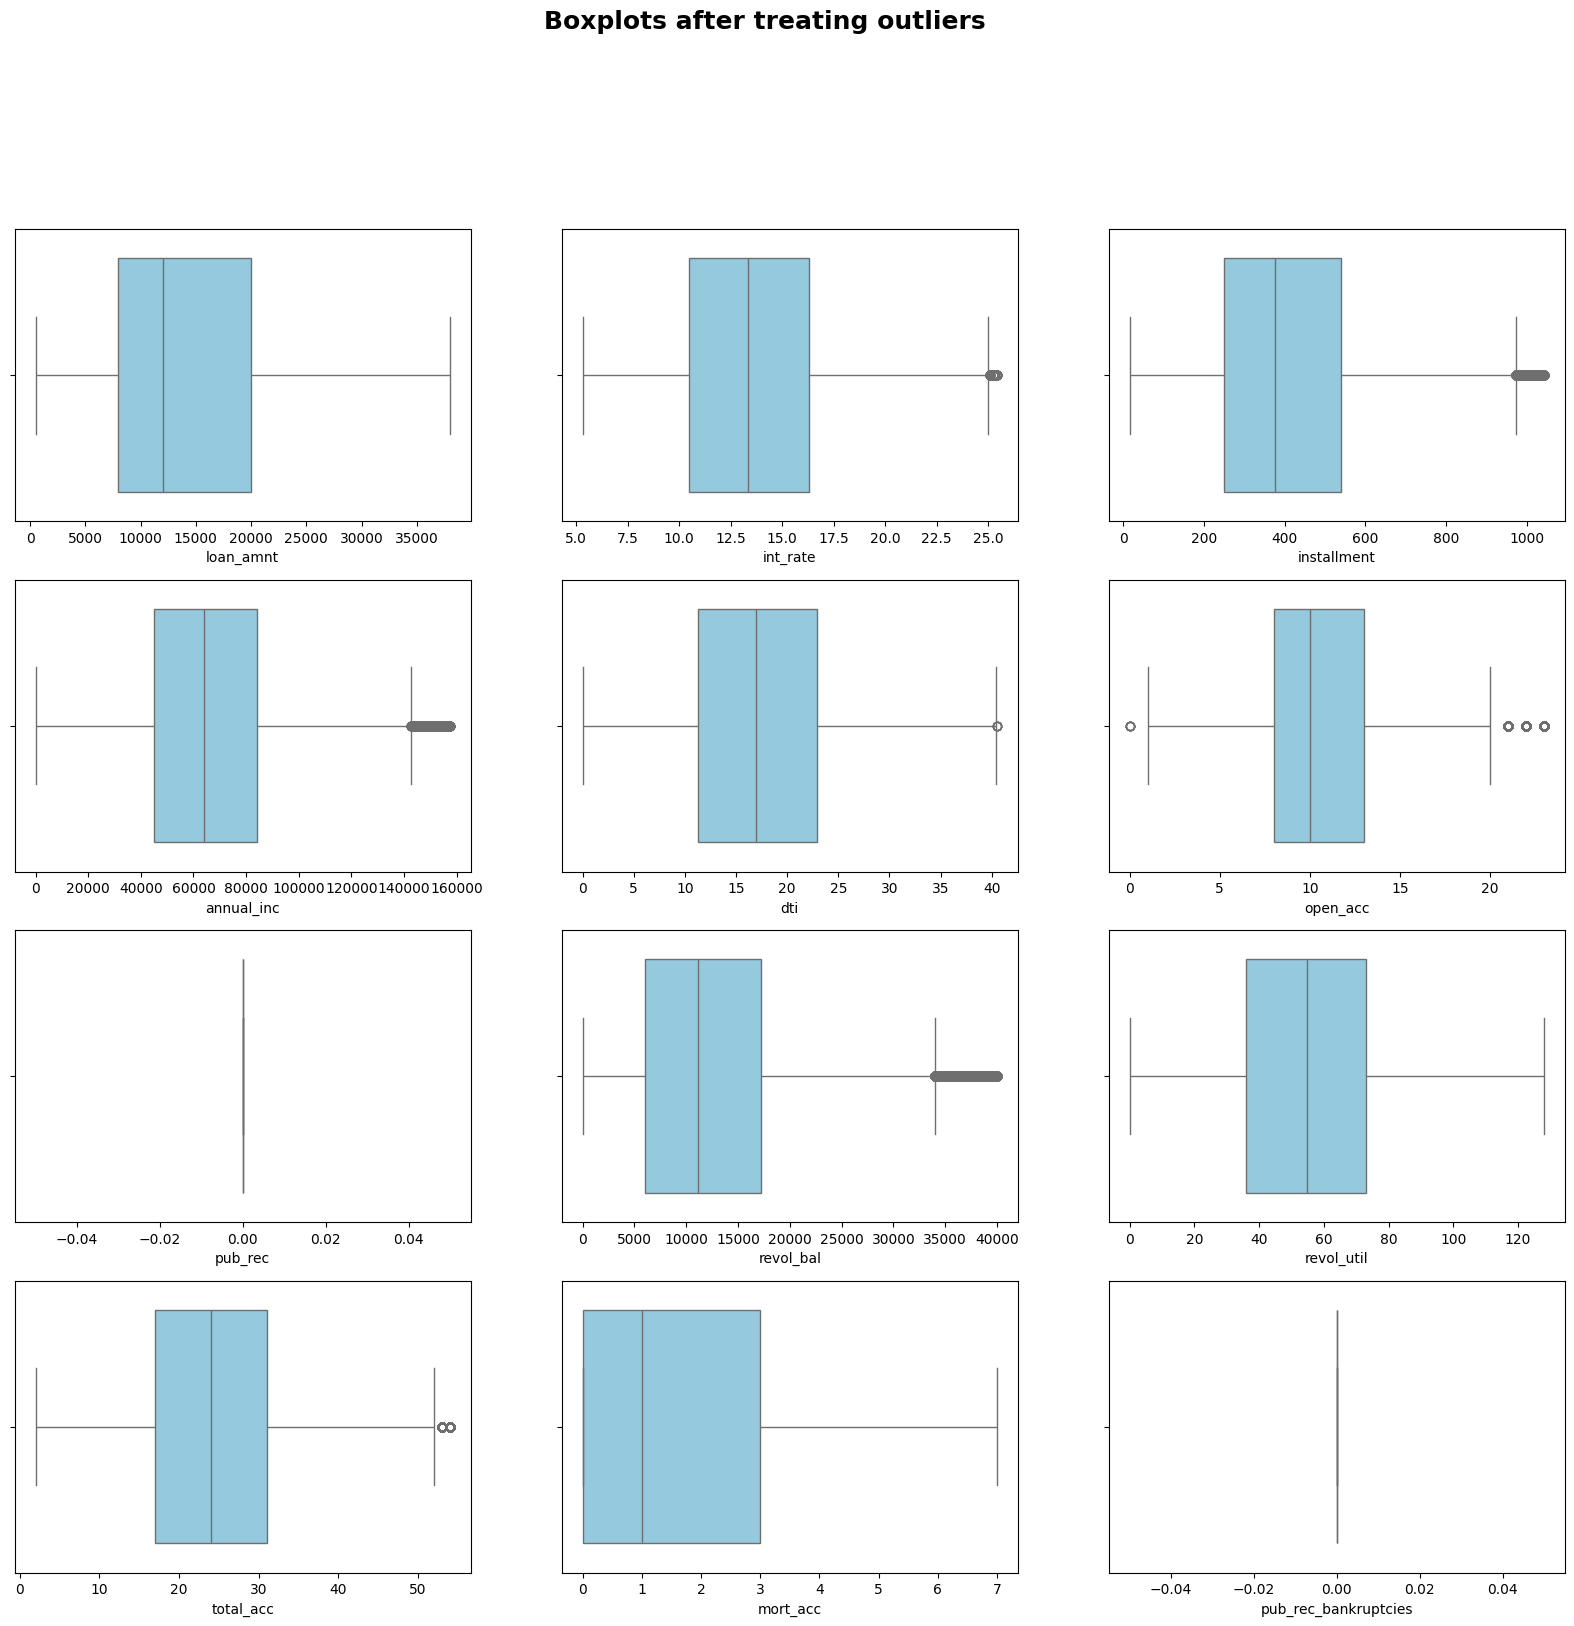

In [12]:
plt.figure(figsize=(20,22))
plt.suptitle('Boxplots after treating outliers', fontsize=18, fontweight='bold')
for i in range(len(numerical_col_df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df[numerical_col_df.columns[i]], color='skyblue')
plt.show()

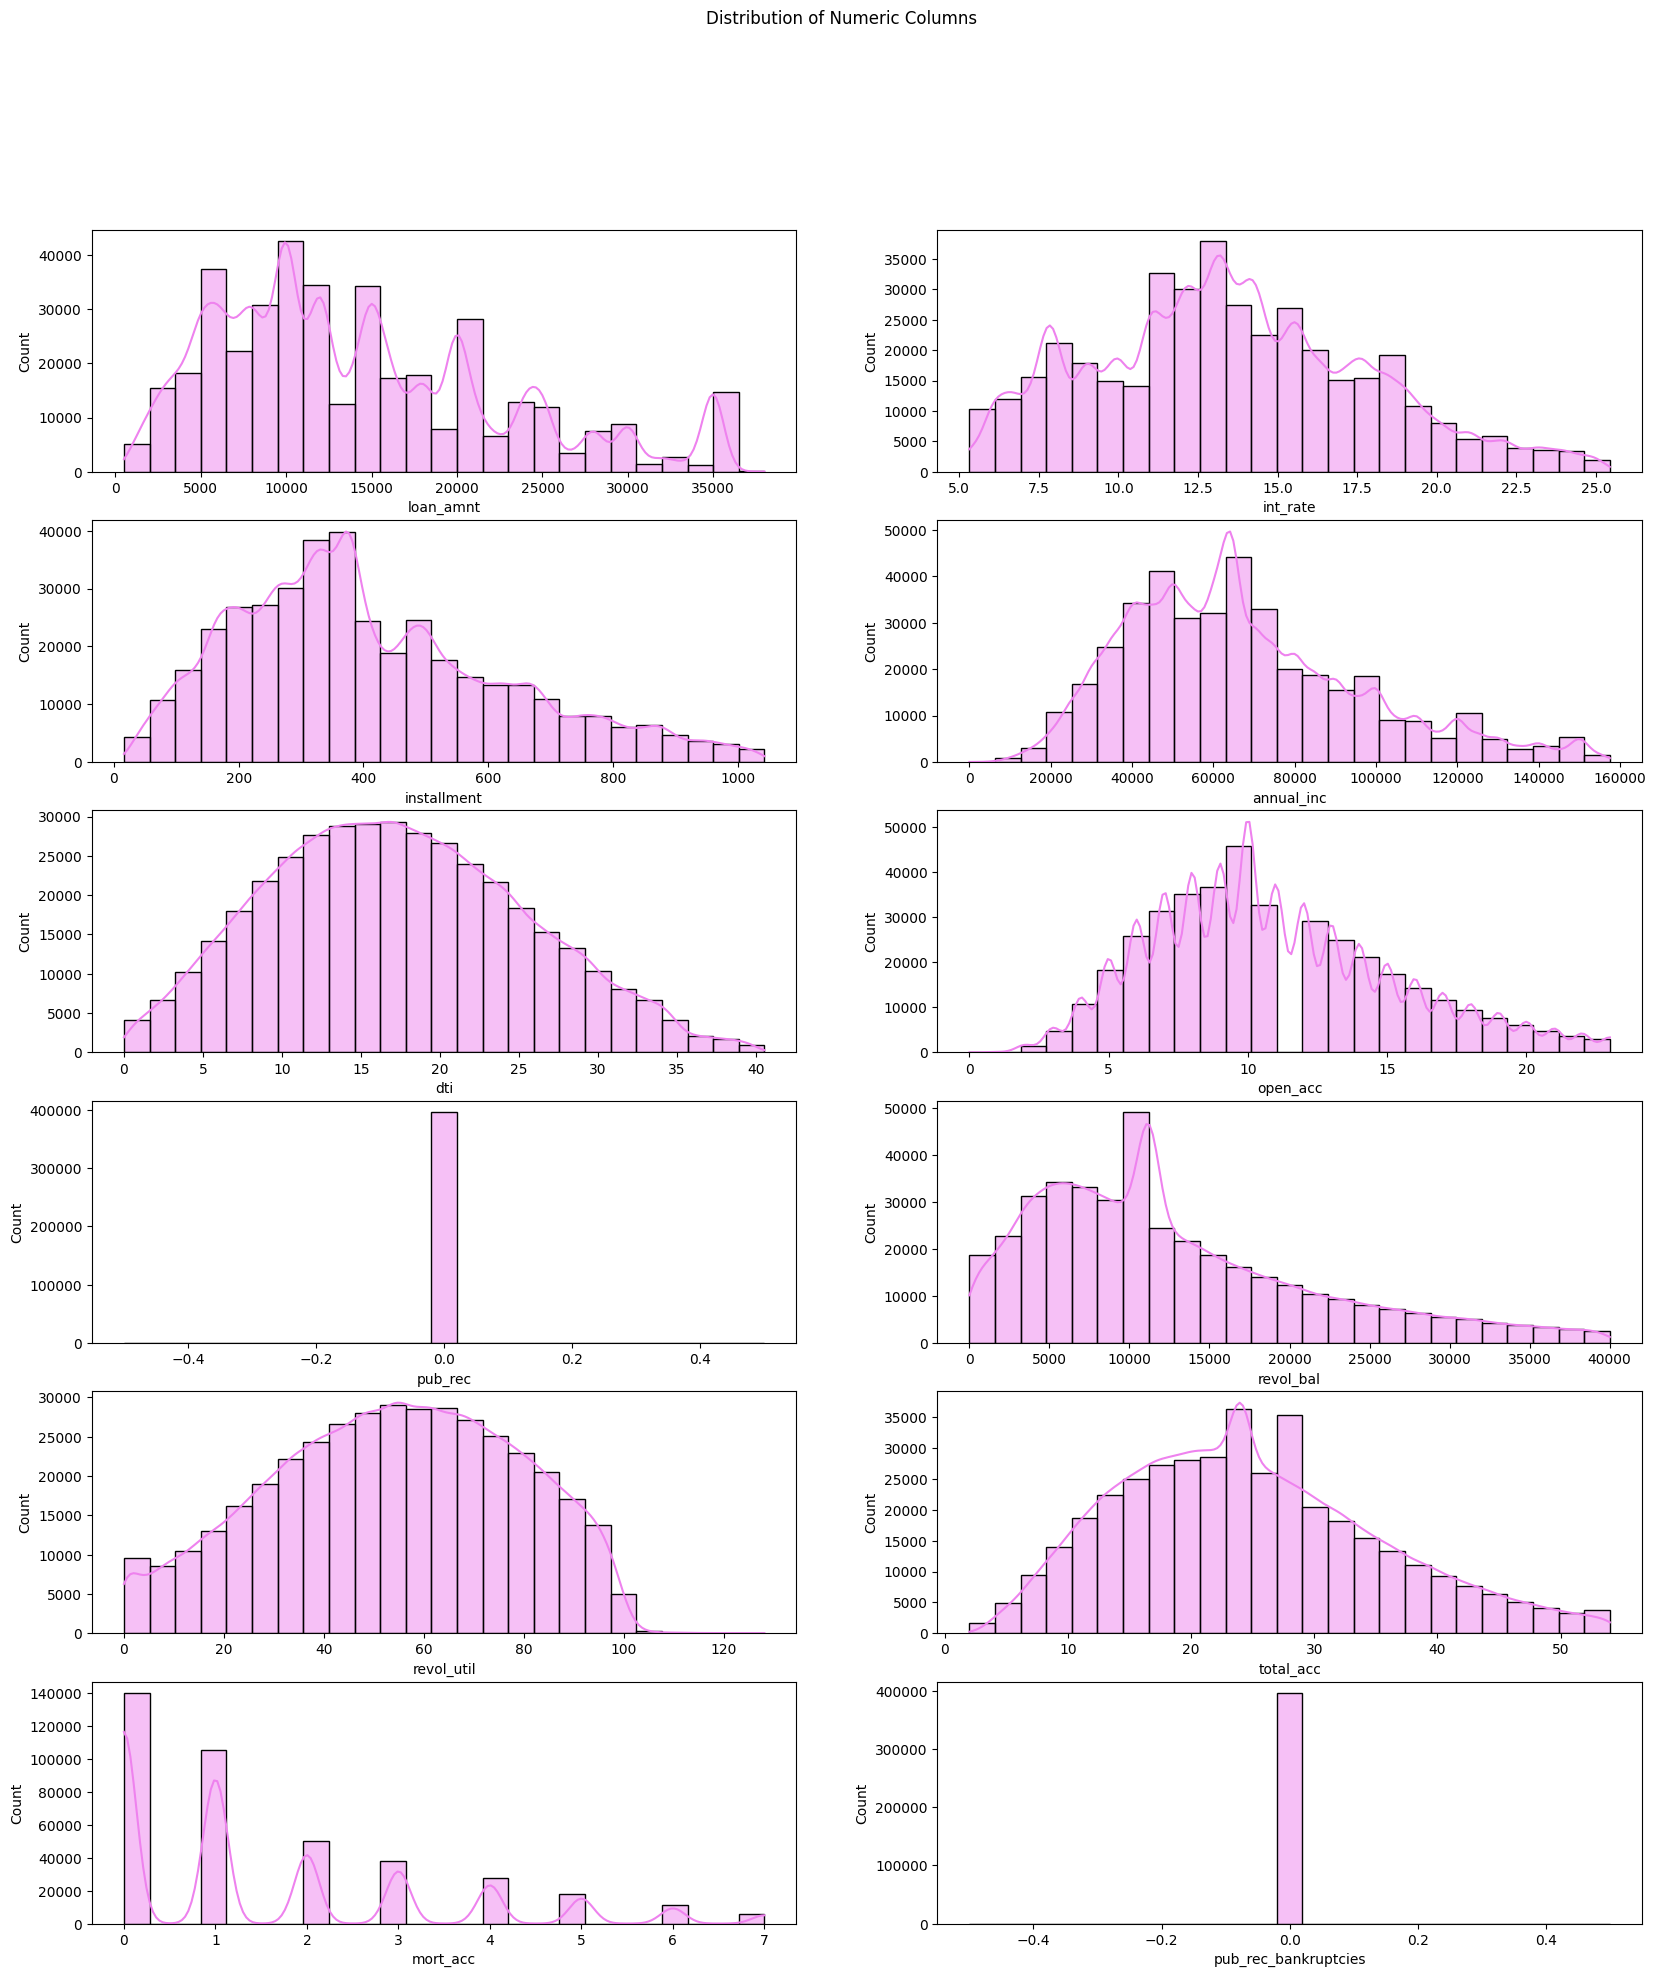

In [100]:
plt.figure(figsize=(20,22))
plt.suptitle('Distribution of Numeric Columns')
for n, col in enumerate(numerical_col_df, 1):
    plt.subplot(6,2,n)
    sns.histplot(x=df[col], bins=25, kde=True, color='violet')

plt.show()
    

In [26]:
for col in categorical_col_df:
    print(f'No. of unique values in {col}-{categorical_col_df[col].nunique()}')

No. of unique values in term-2
No. of unique values in grade-7
No. of unique values in sub_grade-35
No. of unique values in emp_title-173106
No. of unique values in emp_length-12
No. of unique values in home_ownership-6
No. of unique values in verification_status-3
No. of unique values in issue_d-115
No. of unique values in loan_status-2
No. of unique values in purpose-14
No. of unique values in title-48816
No. of unique values in earliest_cr_line-684
No. of unique values in initial_list_status-2
No. of unique values in application_type-3
No. of unique values in address-393700


-->As 'emp_title' have 173105 unique values, and 'title' has 48816, we will not make its countplot

-->We will not get meaningful insights by visualizing the distribution of address and column having dates('issue_d', 
' earliesi_cr_line') in this case hence we will not make its plot.

-->'sub_grade ' is quite similar to 'grade' , hence doing univariate analysis of 'grade' not of 'sub_grade'


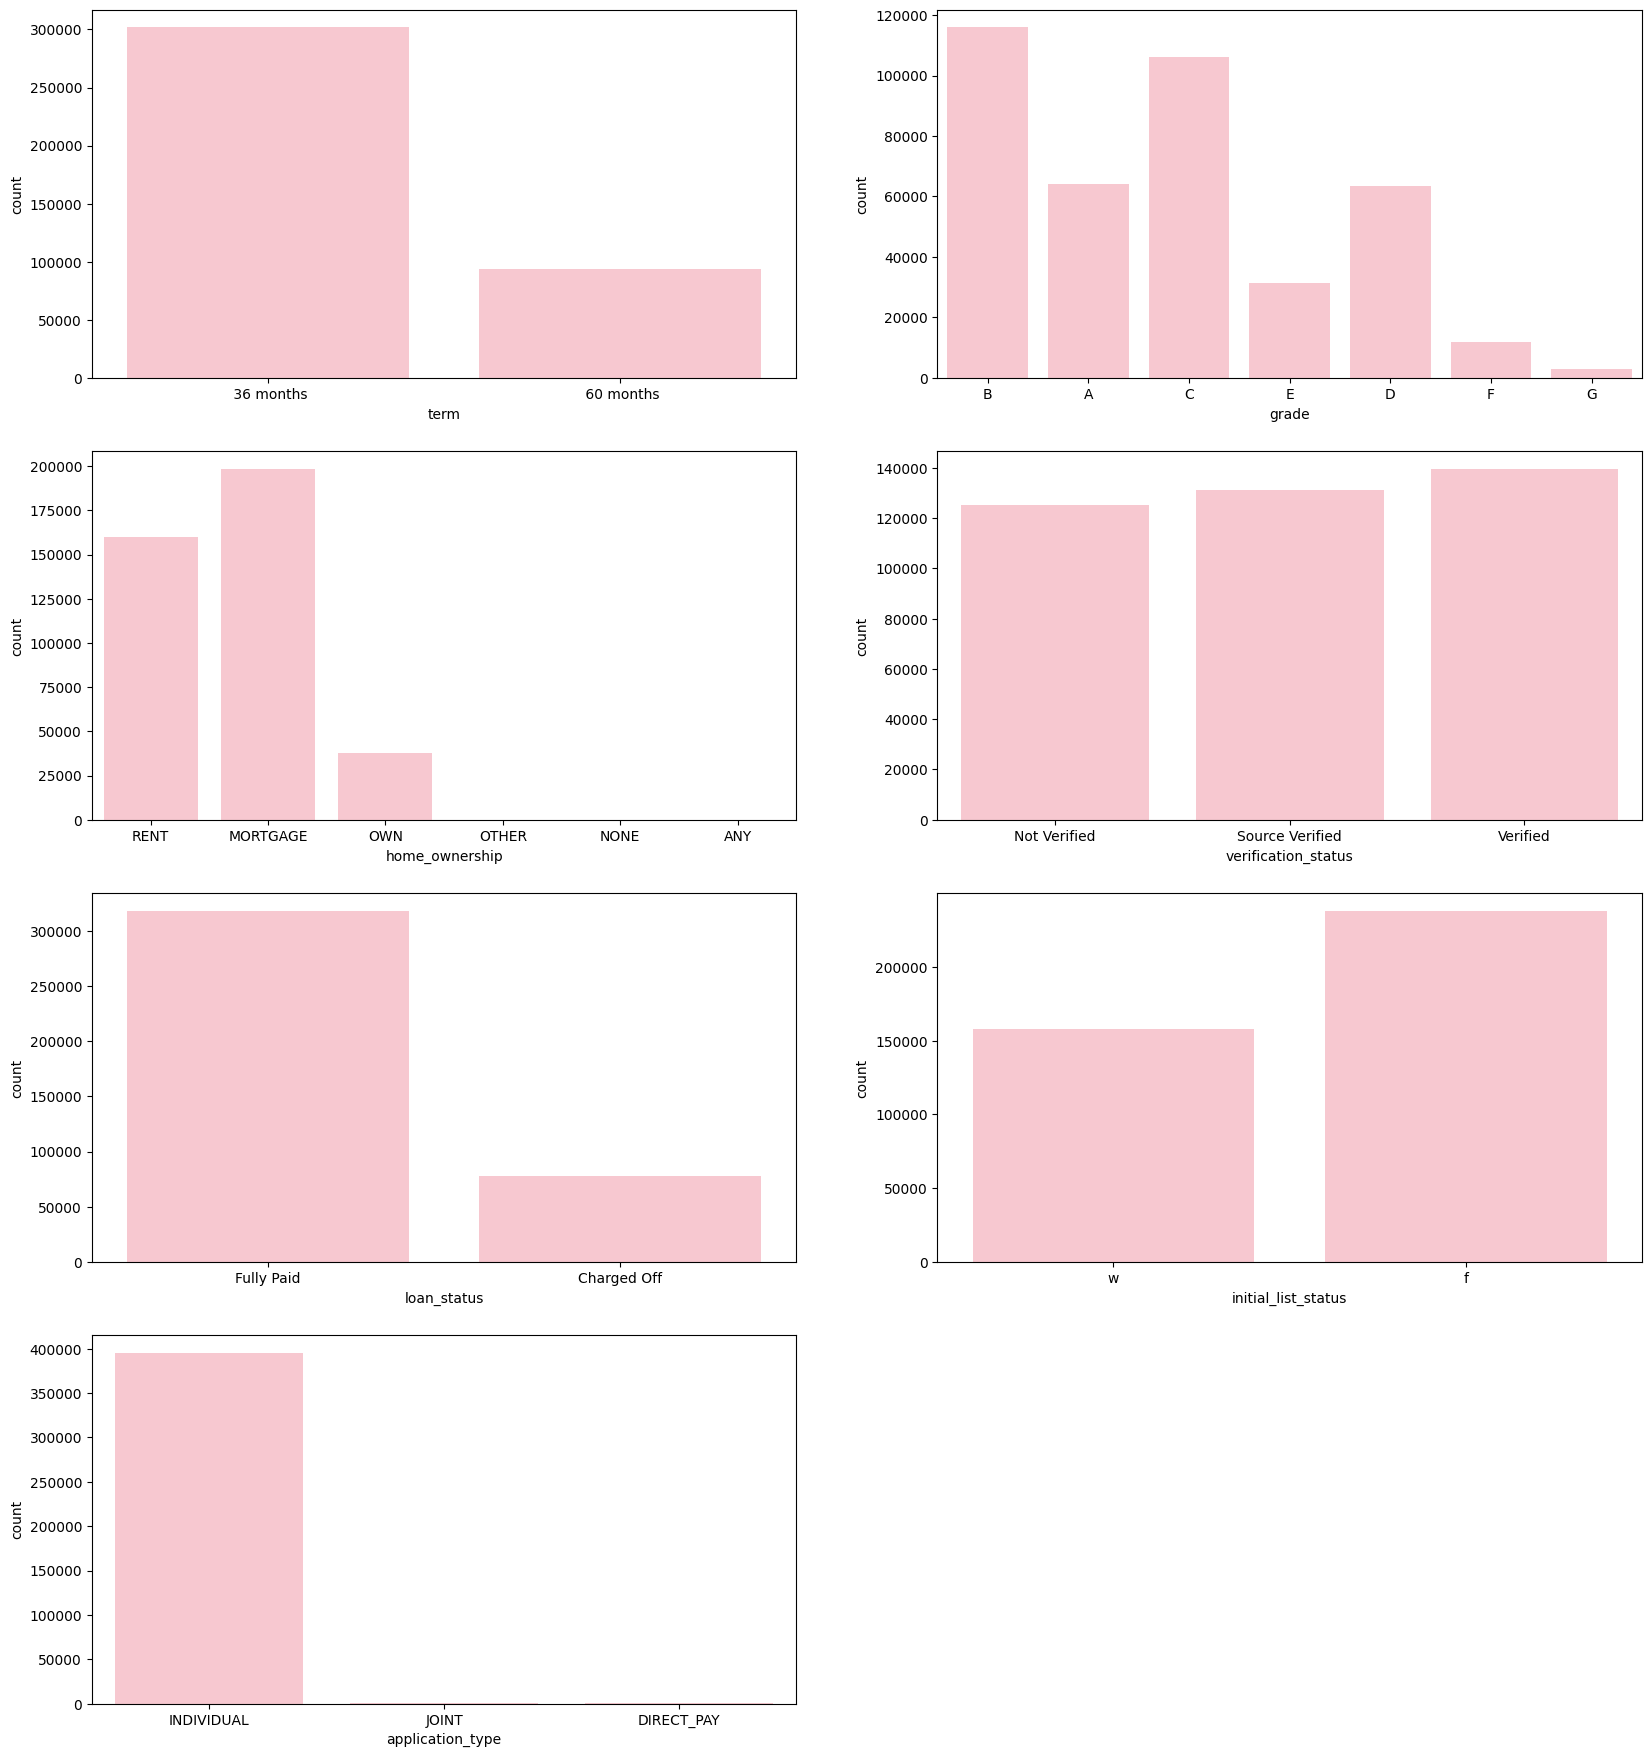

In [27]:
plt.figure(figsize=(20,22))
for m, col in enumerate( categorical_col_df.drop(['emp_title','address', 'issue_d', 'earliest_cr_line', 'title', 'sub_grade', 'title',
                                    'purpose', 'emp_length'], axis=1), 1):
    plt.subplot(4,2,m)
    sns.countplot(x=categorical_col_df[col], color='pink')
plt.show()

-->term- Max no. of payemnts to be given in 36 months

-->Grade- LoanTap assigns loans to individuals in order of their grade (B>C>A=D>E>F>G)

-->home_ownership-The home ownership status provided by the borrower during registration , this infers that most applicants want 
loan for mortgages, then second most common is rent category that is many individuals are renters

-->verification_status- most of the loans are verified

-->loan_status- most of the loans(more than 30000) are fully paid

-->application_type-all the loans are individual loans

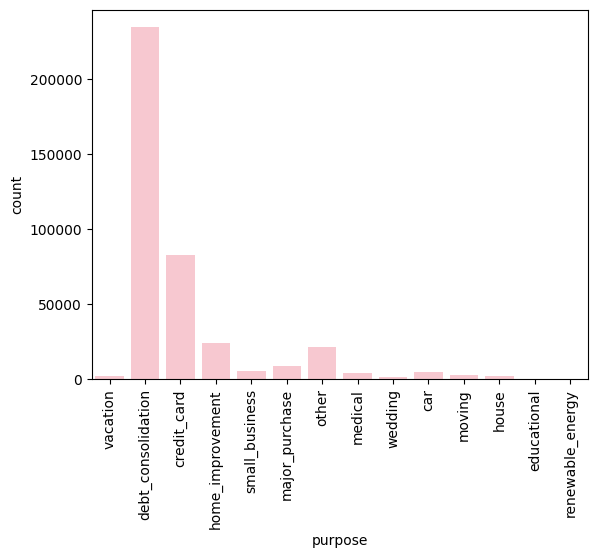

In [28]:
sns.countplot(x=df['purpose'], color='pink')
plt.xticks(rotation=90)
plt.show()

--> purpose - mostof the loans are for debt consolidation

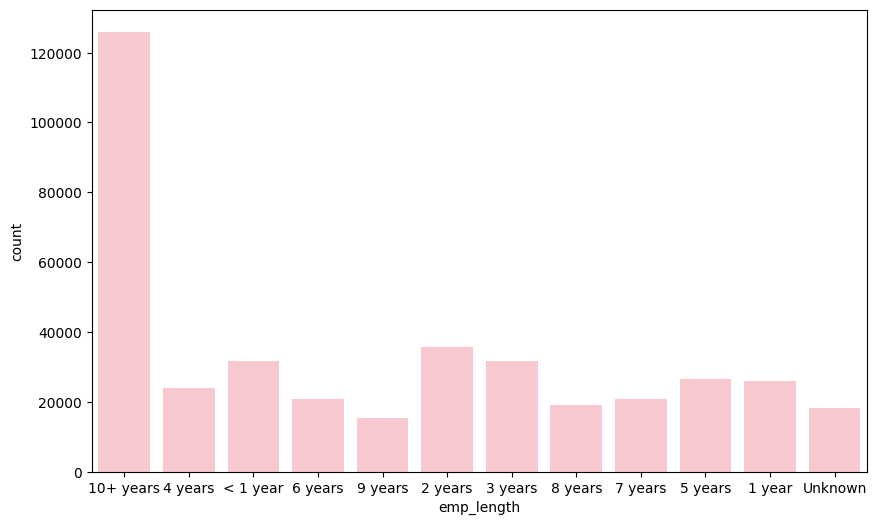

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['emp_length'], color='pink')
plt.show()

--> emp_length- most of the loans are from the individuals whose employment length are 10+ years

### Encoding

### Encoding 'loan_status'

In [13]:
df['loan_status']=df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

### Encoding 'address'

In [14]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [15]:
df['address'] = df['address'].str.extract(r'(\d{5}$)')
df['address'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: address, dtype: object

### Encoding 'grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'title', 'initial_list_status', 'application_type' 
     

In [16]:
categorical_col_df

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [17]:
from sklearn.preprocessing import TargetEncoder
for col in categorical_col_df.drop(['term', 'sub_grade', 'emp_length', 'issue_d', 'earliest_cr_line', 'address'], axis=1):
    TE=TargetEncoder()
    df[col]=TE.fit_transform(df[[col]], df['loan_status'])

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,0.874775,B4,0.732668,10+ years,0.773949,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0.799331,0.803896,0.0,0.0,22690
1,8000.0,36 months,11.99,265.68,0.874255,B5,0.634377,4 years,0.831110,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0.807109,0.803922,3.0,0.0,05113
2,15600.0,36 months,10.49,506.97,0.874775,B3,0.800356,< 1 year,0.772864,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0.806774,0.803922,0.0,0.0,05113
3,7200.0,36 months,6.49,220.65,0.936869,A2,0.803872,6 years,0.772583,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0.806774,0.803896,0.0,0.0,00813
4,24375.0,60 months,17.27,609.33,0.787808,C5,0.803869,9 years,0.831192,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0.806886,0.803922,1.0,0.0,11650


### Encoding 'title'

In [19]:
df['term'] = df['term'].str.extract(r'(\d+)').astype(int)

### Encoding 'sub_grade'

In [20]:
df['sub_grade'] = df['sub_grade'].str[1:].astype(int)  # Extract number

### Encoding 'emp_length'

In [21]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [27]:
# Function to clean and convert emp_length to integer
import re
def convert_emp_length(value):
    if '< 1 year' in value:  
        return 0  # Convert "< 1 year" to 0
    if '10+' in value:  
        return 10  # Convert "10+ years" to 10
    return int(re.sub(r'\D', '', value))  # Extract numeric part 

In [28]:
df['emp_length']=df['emp_length'].apply(convert_emp_length)

### Encoding 'issue_d'

In [29]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df.drop(columns=['issue_d'], inplace=True)  # Drop original column

### Encoding 'earliest_cr_line'

In [30]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_month'] = df['earliest_cr_line'].dt.month
df.drop(columns=['earliest_cr_line'], inplace=True)  # Drop original column

In [31]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,issue_month,earliest_cr_year,earliest_cr_month
0,10000.0,36,11.44,329.48,0.874775,4,0.732668,10,0.773949,117000.0,...,25.0,0.799331,0.803896,0.0,0.0,22690,2015,1,1990,6
1,8000.0,36,11.99,265.68,0.874255,5,0.634377,4,0.831110,65000.0,...,27.0,0.807109,0.803922,3.0,0.0,05113,2015,1,2004,7
2,15600.0,36,10.49,506.97,0.874775,3,0.800356,0,0.772864,43057.0,...,26.0,0.806774,0.803922,0.0,0.0,05113,2015,1,2007,8
3,7200.0,36,6.49,220.65,0.936869,2,0.803872,6,0.772583,54000.0,...,13.0,0.806774,0.803896,0.0,0.0,00813,2014,11,2006,9
4,24375.0,60,17.27,609.33,0.787808,5,0.803869,9,0.831192,55000.0,...,43.0,0.806886,0.803922,1.0,0.0,11650,2013,4,1999,3


### Checking the imbalance Dataset

In [ ]:
sns.countplot(x=df['loan_status'], color='green')
plt.show()

### Splitting the Data

In [32]:
X=df.drop(['loan_status'], axis=1)
y=df['loan_status']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

### Balancing the data

In [34]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()

In [35]:
X_train_sm, y_train_sm=sm.fit_resample(X_train, y_train)

In [36]:
X_train_sm.shape, y_train_sm.shape

((509092, 28), (509092,))

In [38]:
y_train.value_counts()

loan_status
1.0    254546
0.0     62278
Name: count, dtype: int64

In [39]:
y_train_sm.value_counts()

loan_status
0.0    254546
1.0    254546
Name: count, dtype: int64

### Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_train_scaled_sm=scaler.fit_transform(X_train_sm)

In [51]:
X_test_scaled=scaler.transform(X_test)

In [43]:
X_train_scaled_sm

array([[ 1.25196803,  1.65249561,  0.12920385, ...,  1.76969206,
        -0.2809103 ,  0.44589271],
       [-0.59310758, -0.67569747, -0.31825656, ..., -1.66579339,
        -1.90426888,  1.06744042],
       [-0.65262614, -0.67569747, -1.43690759, ..., -0.72884281,
        -0.2809103 ,  0.13511886],
       ...,
       [-0.29551474, -0.67569747,  1.11729197, ..., -0.10420909,
        -1.46153472, -1.72952428],
       [-0.59708319, -0.67569747, -0.04682198, ...,  1.14505835,
         0.45697997,  0.44589271],
       [-0.53358901,  0.58540712,  1.07558166, ..., -0.41652595,
         0.45697997, -0.48642886]])

In [44]:
X_train_scaled_sm=pd.DataFrame(X_train_scaled_sm, columns=X.columns)

In [45]:
X_train_scaled_sm

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,issue_month,earliest_cr_year,earliest_cr_month
0,1.251968,1.652496,0.129204,0.821974,-0.715309,0.122670,-0.438882,1.165812,-1.134742,1.516543,...,1.462940,0.887545,0.017207,-0.307300,0.0,1.848522,-2.608652,1.769692,-0.280910,0.445893
1,-0.593108,-0.675697,-0.318257,-0.455496,0.039719,-0.633416,-0.439298,1.165812,1.118468,-0.880570,...,-0.446075,0.863684,0.020437,0.299694,0.0,0.253883,1.056434,-1.665793,-1.904269,1.067440
2,-0.652626,-0.675697,-1.436908,-0.626156,0.897865,-1.389502,0.029250,1.165812,1.070938,-0.533163,...,-0.446075,-1.308139,0.020437,0.299694,0.0,-1.246121,1.789451,-0.728843,-0.280910,0.135119
3,0.263960,1.652496,2.113594,0.250777,-2.106383,-1.389502,0.503117,0.299932,1.064748,0.092171,...,0.156772,0.926658,0.017207,0.299694,0.0,-1.396335,1.056434,-1.041160,1.047292,0.756667
4,-1.390656,-0.675697,0.365093,-1.495775,0.043848,0.122670,0.059049,0.877185,1.085813,-0.046792,...,1.965313,-1.371641,0.017207,3.334669,0.0,-1.396335,-0.409600,-0.104209,-1.756691,-0.486429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509087,-0.286860,-0.675697,-0.480947,-0.065516,0.171875,-0.633416,1.232093,-0.854573,1.113387,1.342839,...,0.119786,0.866782,0.017207,1.856134,0.0,-0.351477,0.323417,0.208108,-0.723644,-0.175655
509088,-1.225061,1.458480,-0.951031,-1.525602,0.901356,0.878757,0.011417,-0.277320,-0.354753,-0.723466,...,-0.454997,0.887545,0.020196,-0.334251,0.0,0.253883,-1.875635,-1.665793,-0.428488,0.445893
509089,-0.295515,-0.675697,1.117292,0.089928,-0.748100,0.122670,-0.423842,1.165812,1.069503,-0.184958,...,-0.551158,0.812417,0.018949,0.271852,0.0,1.848522,-1.142618,-0.104209,-1.461535,-1.729524
509090,-0.597083,-0.675697,-0.046822,-0.431074,0.140213,0.122670,-0.429991,1.165812,0.068815,-1.054274,...,-0.566586,0.860225,0.019689,0.057014,0.0,0.253883,0.323417,1.145058,0.456980,0.445893


In [46]:
from sklearn.linear_model import LogisticRegression

### Model Building

In [101]:
model=LogisticRegression(C=10, penalty='l2', solver='liblinear')

In [102]:
model.fit(X_train_scaled_sm, y_train_sm)

LogisticRegression(C=10, solver='liblinear')

In [103]:
train_pred=model.predict(X_train_scaled_sm)

In [104]:
test_pred=model.predict(X_test_scaled)

In [105]:
from sklearn.metrics import f1_score

print(f'Training F1 score: {round(f1_score(y_train_sm, train_pred)*100,2)}')
print(f'Testing F1 score: {round(f1_score(y_test, test_pred)*100,2)}')

Training F1 score: 72.66
Testing F1 score: 80.94


In [54]:
model_coeffecients=pd.DataFrame(model.coef_[0], X_train_scaled_sm.columns)
model_coeffecients

,0
loan_amnt,-0.051523
term,-0.185967
int_rate,-0.243447
installment,-0.018766
grade,0.260027
sub_grade,0.150170
emp_title,0.159511
emp_length,0.089904
home_ownership,0.104004
annual_inc,0.118660


In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [57]:
Conf_Matrix=confusion_matrix(y_test, test_pred)
Conf_Matrix

array([[10297,  5098],
       [16941, 46870]])

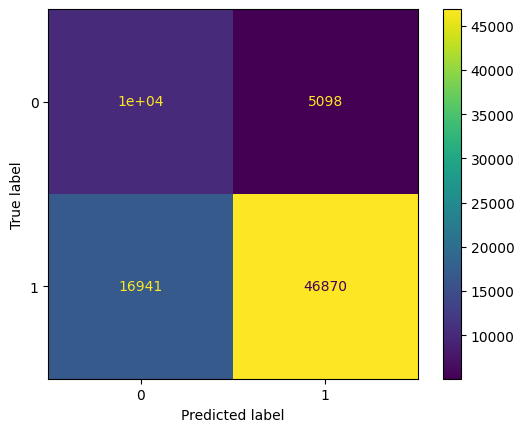

In [58]:
ConfusionMatrixDisplay(Conf_Matrix).plot()
plt.show()

In [59]:
from sklearn.metrics import classification_report

In [61]:
ClassificationReport=classification_report(y_test, test_pred)
print(ClassificationReport)

              precision    recall  f1-score   support

         0.0       0.38      0.67      0.48     15395
         1.0       0.90      0.73      0.81     63811

    accuracy                           0.72     79206
   macro avg       0.64      0.70      0.65     79206
weighted avg       0.80      0.72      0.75     79206



In [65]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

probability=model.predict_proba(X_test_scaled)
probability

array([[0.80960185, 0.19039815],
       [0.73671204, 0.26328796],
       [0.58436836, 0.41563164],
       ...,
       [0.45386833, 0.54613167],
       [0.6410776 , 0.3589224 ],
       [0.28705172, 0.71294828]])

In [68]:
probabilities=probability[:,1]
probabilities

array([0.19039815, 0.26328796, 0.41563164, ..., 0.54613167, 0.3589224 ,
       0.71294828])

In [69]:
fpr,tpr,thr=roc_curve(y_test, probabilities)

In [70]:
print(f'FPR:\n {fpr}\n\n\n')
print(f'TPR:\n {tpr}\n\n\n')
print(f'Threshold:\n {thr}\n\n\n')

FPR:
 [0.        0.        0.        ... 0.9983761 0.9983761 1.       ]



TPR:
 [0.00000000e+00 1.56712792e-05 8.46249079e-03 ... 9.99984329e-01
 1.00000000e+00 1.00000000e+00]



Threshold:
 [       inf 0.97615107 0.94621321 ... 0.02507922 0.02404533 0.00621191]





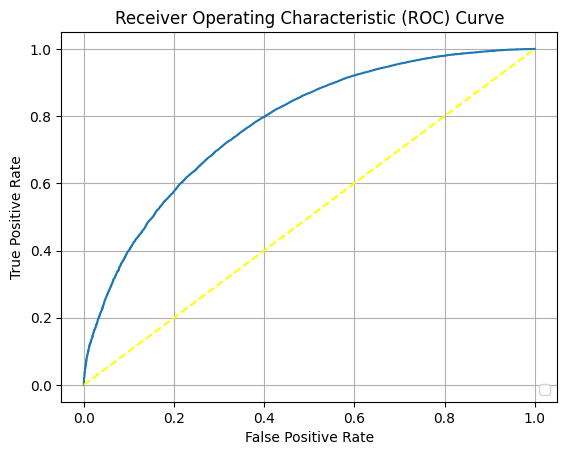

In [77]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [72]:
roc_auc_score(y_test, probabilities)

np.float64(0.7763775819189657)

In [73]:
from sklearn.metrics import precision_recall_curve

In [74]:
precision, recall, thr=precision_recall_curve(y_test, probabilities)

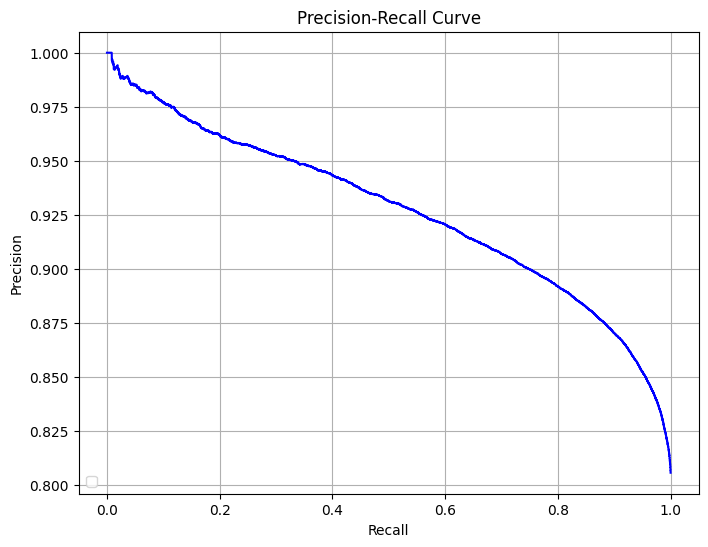

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    n_estimators=100,             # Number of trees
    learning_rate=0.1,            # Step size shrinkage
    max_depth=3,                  # Depth of trees
    subsample=0.8,                # Fraction of samples used per tree
    colsample_bytree=0.8,         # Fraction of features used per tree
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train_scaled_sm, y_train_sm)

# Predict on test set
y_pred2= xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.89

Confusion Matrix:
 [[ 7958  7437]
 [ 1585 62226]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.52      0.64     15395
         1.0       0.89      0.98      0.93     63811

    accuracy                           0.89     79206
   macro avg       0.86      0.75      0.79     79206
weighted avg       0.88      0.89      0.88     79206



In [108]:
probability2=xgb_classifier.predict_proba(X_test_scaled)
probability2

array([[0.37331134, 0.62668866],
       [0.434119  , 0.565881  ],
       [0.2213785 , 0.7786215 ],
       ...,
       [0.32763195, 0.67236805],
       [0.33381653, 0.6661835 ],
       [0.00446761, 0.9955324 ]], dtype=float32)

In [112]:
probabilities2=probability2[:,1]
probabilities2

array([0.62668866, 0.565881  , 0.7786215 , ..., 0.67236805, 0.6661835 ,
       0.9955324 ], dtype=float32)

In [113]:
fpr,tpr,thr=roc_curve(y_test, probabilities2)

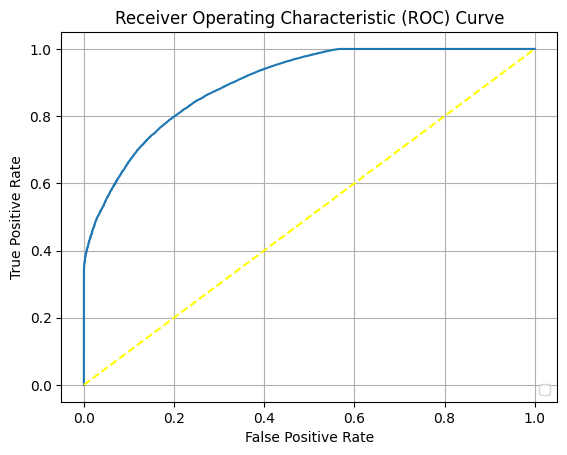

In [114]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [115]:
roc_auc_score(y_test, probabilities2)

np.float64(0.8991127989516012)

In [119]:
precision2, recall2, thr=precision_recall_curve(y_test, probabilities2)

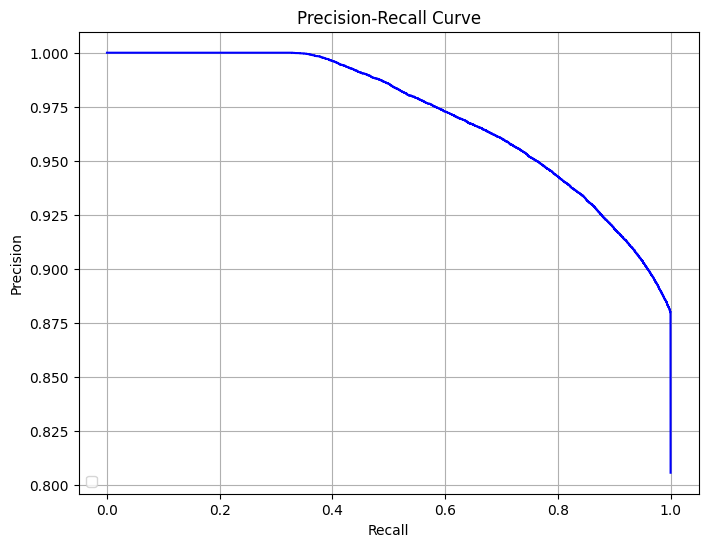

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(recall2, precision2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()